In [4]:
CLIP_VALUE = 1e-2

In [5]:
import os
import argparse
from typing import List

# Third-party imports
import torch
import yaml
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
import json

# First-party imports
from models.mixing_network import MixingNetwork
from models.simple_network import SimplePeriodicNetwork

from modules.property_prediction import (
    SevenNetPropertiesPredictor,
    AseCalculatorPropertiesPredictor,
    RandomPropertiesPredictor,
)

from modules.train import Trainer

from ase.io import read

def find_extended_sevennet_conductivity(  # pylint: disable=R0913, R0914, R0917, R1702
    root_folders
):
    """
    Constructs an extended dataset of atomic structures with diffusion properties
    based on sevennet inputs.
    """

    li_conductivity = []
    elements = []

    for root_folder in root_folders:
        slopes_file = os.path.join(root_folder, "slopes.json")

        with open(slopes_file, "r", encoding="utf-8") as file:
            slopes_info = json.load(file)

        for folder in os.listdir(root_folder):
            if "runs-1000K" in folder:
                for mp_id in os.listdir(os.path.join(root_folder, folder)):
                    if (
                        ".output" not in mp_id
                        and ".dvc" not in mp_id
                        and ".gitignore" not in mp_id
                    ):
                        name = os.path.join(folder, mp_id)
                        if name in slopes_info.keys():
                            li_conductivity.append(max(CLIP_VALUE, slopes_info[name]["Li"]))

                        full_path = os.path.join(root_folder, folder, mp_id)
                        relaxed_structure_path = os.path.join(
                                full_path, "relax_02.traj"
                            )
                        
                        relaxed_structure = read(relaxed_structure_path, index=-1)
                        elements.extend(relaxed_structure.get_chemical_symbols())
    return li_conductivity, elements

In [6]:
root_folders = ["/mnt/hdd/maevskiy/SuperionicToy-runs/mp-sevennet/v0-2025-02-19",
                "/mnt/hdd/maevskiy/SuperionicToy-runs/mp-sevennet/v0-2025-02-20",
                "/mnt/hdd/maevskiy/SuperionicToy-runs/mp-sevennet/v0-2025-02-21"]

In [7]:
cond_1000_new_data, elements_new_data = find_extended_sevennet_conductivity(root_folders)

In [8]:
type(cond_1000_new_data)

list

In [9]:
import pandas as pd

df = pd.read_csv('../data/sevennet_slopes.csv')
df['v1_Li_slope'] = df['v1_Li_slope'].clip(lower=CLIP_VALUE)

In [10]:
cond_1000_old_data = df[df['temperature'] == 1000]['v1_Li_slope'].to_list()

In [11]:
type(cond_1000_old_data)

list

NameError: name 'cond_1000_old_data' is not defined

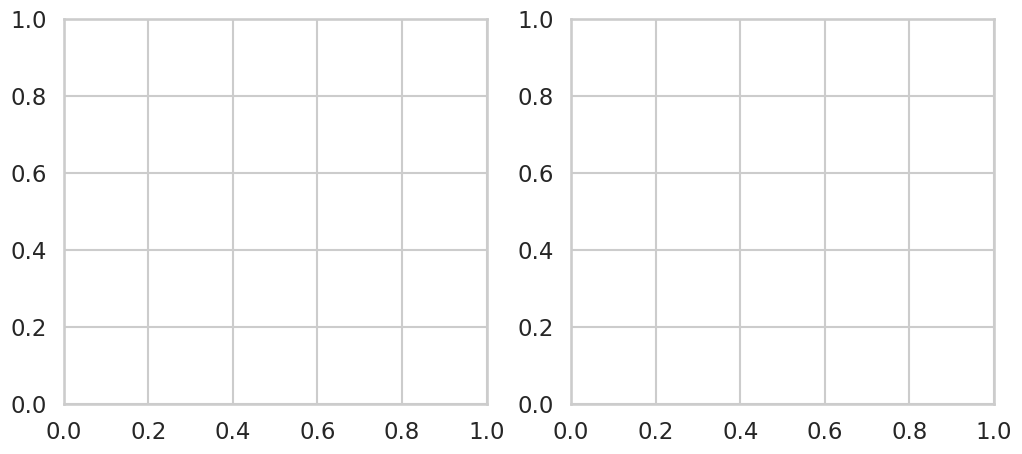

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Создаем холст с двумя подграфиками (в две строки и одну колонку)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 2 строки, 1 колонка

# Второй график
axes[0].hist(np.log10(cond_1000_old_data), bins=10, color='skyblue', edgecolor='black')
axes[0].set_title("Distribution of Li-ion Conductivity 1000K Old Data", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Log10 of Li-ion Conductivity (S/cm)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Первый график
axes[1].hist(np.log10(cond_1000_new_data), bins=10, color='skyblue', edgecolor='black')
axes[1].set_title("Distribution of Li-ion Conductivity 1000K New Data", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Log10 of Li-ion Conductivity (S/cm)")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


# Подгоняем макет, чтобы графики не накладывались
plt.tight_layout()

# Показываем графики
plt.show()


In [13]:
cond_1000_new_data

[0.01,
 0.01,
 0.01,
 7.089059823604761,
 0.01,
 0.30922852757241354,
 0.01,
 4.767614081662761,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 2.3542800345164845,
 0.9400913535748269,
 0.01,
 2.470971410270384,
 0.01,
 0.04059678807697598,
 1.9963297175963037,
 0.01,
 0.01,
 7.6243008933655565,
 0.8785016243051801,
 0.01,
 0.01,
 1.0552566114385789,
 0.01,
 0.01,
 2.013978862997474,
 9.888426042833487,
 0.01,
 0.01,
 0.03800250962567137,
 0.2544945042218929,
 0.01,
 0.01,
 4.054705089005172,
 0.01,
 0.01,
 0.01,
 0.08280803053646744,
 8.090290958072615,
 0.01,
 0.01,
 0.01,
 0.01,
 0.4168298711644582,
 3.2475001161531916,
 0.01,
 0.06282756345357854,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 1.1478321632921464,
 0.01,
 0.01,
 0.8234648313181371,
 0.01,
 1.7313170725529148,
 10.226778040787247,
 0.01,
 0.01,
 0.01,
 4.422082280775909,
 1.5168207852928821,
 0.01,
 0.01,
 0.01,
 0.02710425700881668,
 0.1432103968840292,
 3.443081428812472,
 6.833606614276431,
 0.01,
 0.01,
 0.01,
 1.24345686434289

In [14]:
elements_new_data

['Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 '

In [15]:
from pymatgen.core.periodic_table import Element

def get_chemical_number(element_symbol):
    atomic_number = Element(element_symbol).Z
    return atomic_number

atomic_numbers = []
for elem in set(elements_new_data):
    atomic_numbers.append(get_chemical_number(elem))
# atomic_numbers = set(map(get_chemical_number, set(elements_new_data)))

print(sorted(atomic_numbers))

[1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 31, 32, 33, 34, 35, 37, 38, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 71, 81, 82, 83, 90, 91, 92, 93]


In [16]:
import torch
import torch_scatter

src = torch.tensor([1, 2, 3, 4, 5])  # Values to sum
index = torch.tensor([0, 2, 0, 2, 0])  # Grouping indices

out = torch_scatter.scatter_sum(src, index, dim=0)
print(out)  # tensor([1+3+5, 2+4]) -> tensor([9, 6])


tensor([9, 0, 6])


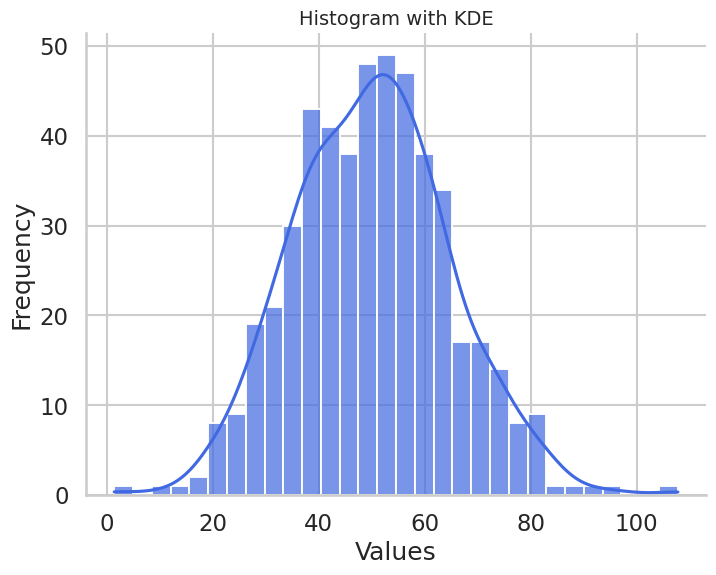

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=500)
df = pd.DataFrame({'Values': data})

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_context("talk")

# Create figure
plt.figure(figsize=(8, 6))

# Histogram
sns.histplot(df, x="Values", bins=30, kde=True, color="royalblue", alpha=0.7)
plt.title("Histogram with KDE", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Frequency")

# Beautify
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()


In [7]:
from modules.dataset import (
    split_dataset_train_val_part,
)


Cache path set to "./cache". To change, set PFP_CACHE environment variable.


In [8]:
from main import load_config, select_dataset, select_property_predictor

In [9]:
config_path = "../configs/2025_04_01/sevennet_baseline_light_version_lr_1e-3_extended_md_by_sevennet_trajectory_per_interval_num_noisy_configs_5_PerChemicalElement_from_280_checkpoint.yaml"

In [10]:
config = load_config(config_path)
config["wandb"]["verbose"] = False

device = (
        ("cuda" if torch.cuda.is_available() else "cpu")
        if not config["training"]["device"]
        else config["training"]["device"]
    )

dataset = select_dataset(config)
predictor = select_property_predictor(config, dataset, device)

print(f"length of dataset: {len(dataset)}")

train_dataset, val_dataset = split_dataset_train_val_part(
    dataset=dataset,
    test_size=config["data"]["test_size"],
    random_state=config["data"]["random_state"],    
)


1000
0
1000
1
1000
2
1000
3
1000
4
1000
5
1000
6
1000
7
1000
8
1000
9
1000
10
1000
11
1000
12
1000
13
1000
14
1000
15
1000
16
1000
17
1000
18
1000
19
1000
20
1000
21
1000
22
1000
23
1000
24
1000
25
1000
26
1000
27
1000
28
1000
29
1000
30
1000
31
1000
32
1000
33
1000
34
1000
35
1000
36
1000
37
1000
38
1000
39
1000
40
1000
41
1000
42
1000
43
1000
44
1000
45
1000
46
1000
47
1000
48
1000
49
1000
50
1000
51
1000
52
1000
53
1000
54
1000
55
1000
56
1000
57
1000
58
1000
59
1000
60
1000
61
1000
62
1000
63
1000
64
1000
65
1000
66
1000
67
1000
68
1000
69
1000
70
1000
71
1000
72
1000
73
1000
74
1000
75
1000
76
1000
77
1000
78
1000
79
1000
80
1000
81
1000
82
1000
83
1000
84
1000
85
1000
86
1000
87
1000
88
1000
89
1000
90
1000
91
1000
92
1000
93
1000
94
1000
95
1000
96
1000
97
1000
98
1000
99
1000
100
1000
101
1000
102
1000
103
1000
104
1000
105
1000
106
1000
107
1000
108
1000
109
1000
110
1000
111
1000
112
1000
113
1000
114
1000
115
1000
116
1000
117
1000
118
1000
119
1000
120
1000
121
1000
122
100

In [17]:
train_data = []

for data in train_dataset:
    if "Li" in data.x["log_diffusion"]:
        train_data.append(data.x["log_diffusion"]["Li"])

In [19]:
val_data = []

for data in val_dataset:
    if "Li" in data.x["log_diffusion"]:
        val_data.append(data.x["log_diffusion"]["Li"])

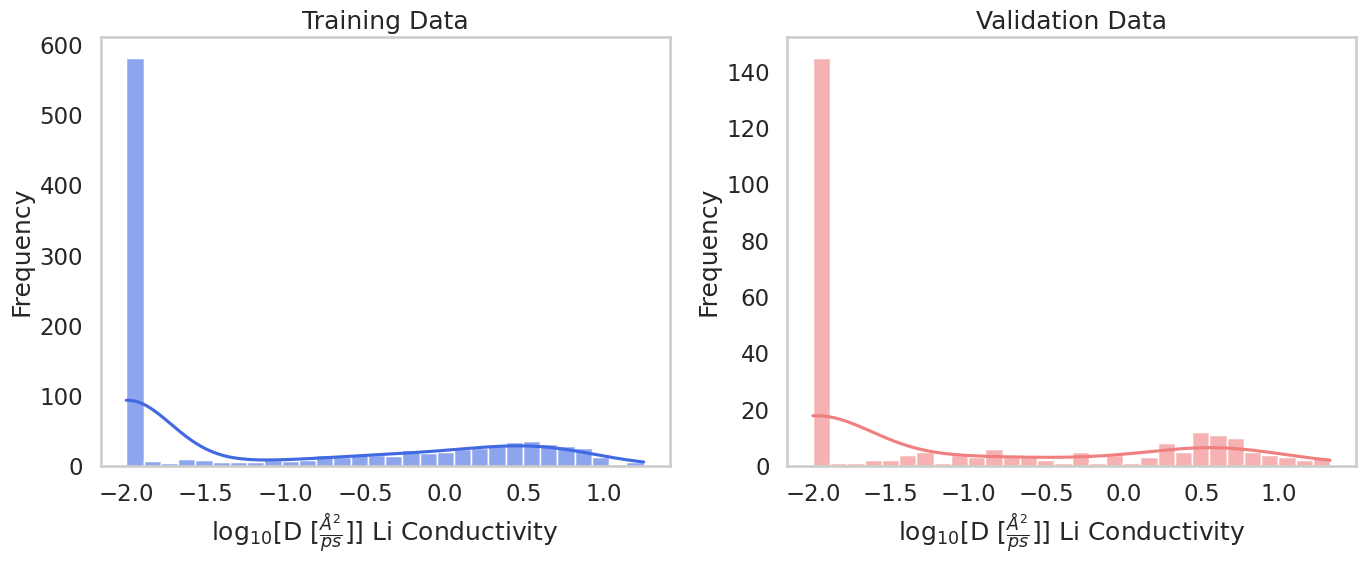

In [33]:
# Set Seaborn style
sns.set_style("whitegrid")
sns.set_context("talk")

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for training set
sns.histplot(train_data, bins=30, kde=True, color="royalblue", alpha=0.6, ax=axes[0])
axes[0].set_title("Training Data", fontsize=18)
axes[0].set_xlabel(r"log$_{10}$[D [$\frac{\AA^2}{ps}$]] Li Conductivity")
axes[0].set_ylabel("Frequency")

# Histogram for validation set
sns.histplot(val_data, bins=30, kde=True, color="lightcoral", alpha=0.6, ax=axes[1])
axes[1].set_title("Validation Data", fontsize=18)
axes[1].set_xlabel(r"log$_{10}$[D [$\frac{\AA^2}{ps}$]] Li Conductivity")
axes[1].set_ylabel("Frequency")

# Beautify
# for ax in axes:
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)

axes[0].grid(False)
axes[1].grid(False)
plt.tight_layout()
plt.show()


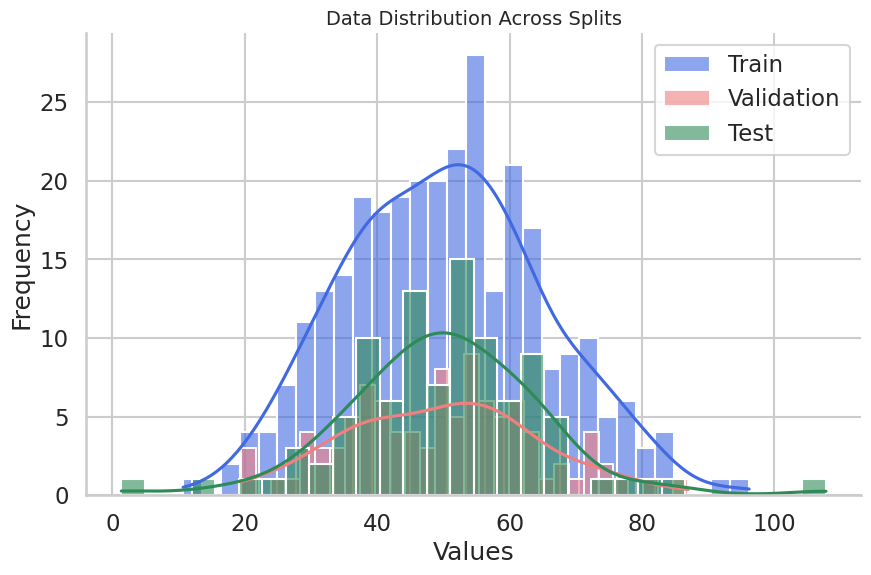

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=500)
df = pd.DataFrame({'Values': data})

# Split data into training, validation, and test sets
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_context("talk")

# Create figure
plt.figure(figsize=(10, 6))

# Histogram for all sets
sns.histplot(train_data, x="Values", bins=30, kde=True, color="royalblue", alpha=0.6, label="Train")
sns.histplot(val_data, x="Values", bins=30, kde=True, color="lightcoral", alpha=0.6, label="Validation")
sns.histplot(test_data, x="Values", bins=30, kde=True, color="seagreen", alpha=0.6, label="Test")

# Labels and title
plt.title("Data Distribution Across Splits", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()

# Beautify
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()
